#### Задача 4.1

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

%matplotlib inline

In [93]:
M = 100
N = 1000

theta = (1, 10 ,100)

#генерируем M выборок размера N из равномерного распределения
samples = np.zeros((3, M, N))
for i in range(0, 3):
    for j in range(0, M):
        samples[i][j] = sps.uniform.rvs(0, theta[i], size=N)

#для каждой выборки считаем заданные оценки
estimates = np.zeros((3, 4, M, N))
for i in range(0, 3):
    for j in range(0, M):
            estimates[i][0][j] = np.array([2 * samples[i][j][:k].mean() 
                                           for k in range(1, N + 1)])
            estimates[i][1][j] = np.array([(k + 1) * samples[i][j][:k].min() 
                                           for k in range(1, N + 1)])
            estimates[i][2][j] = np.array([samples[i][j][:k].min() + 
                                           samples[i][j][:k].max() 
                                               for k in range(1, N + 1)])
            estimates[i][3][j] = np.array([samples[i][j][:k].max() * (k + 1) / k
                                           for k in range(1, N + 1)])

#вычисляем функцию потерь
loss = np.zeros((3, 4, M, N))
for i in range(0, 3):
    for j in range(0, 4):
        for k in range(0, M):
            loss[i][j][k] = np.array([(estimates[i][j][k][f] - theta[i]) ** 2 
                                      for f in range(0, N)])

#усредняем функцию потерь по M для каждого конкретного n <= N
average_loss = np.zeros((3, 4, N))
for i in range(0, 3):
    for j in range(0, 4):
        average_loss[i][j] = np.array([np.mean(loss[i][j], axis=0)])

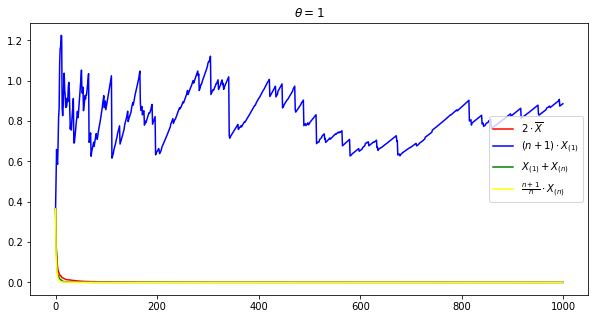

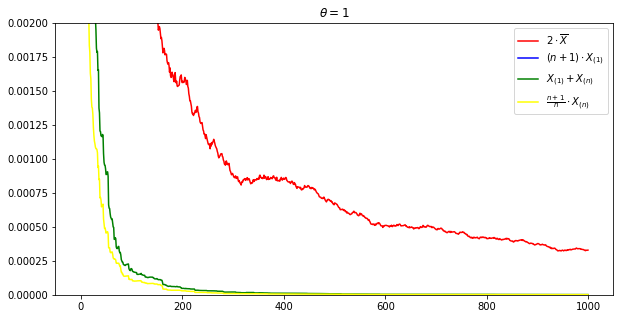

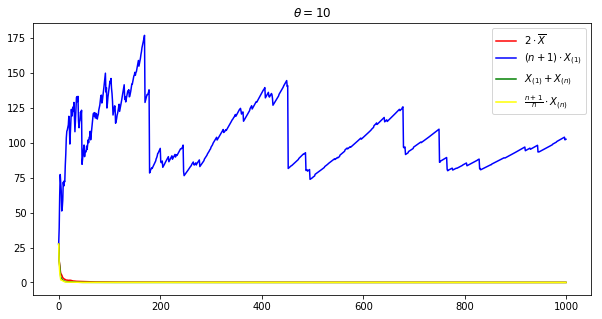

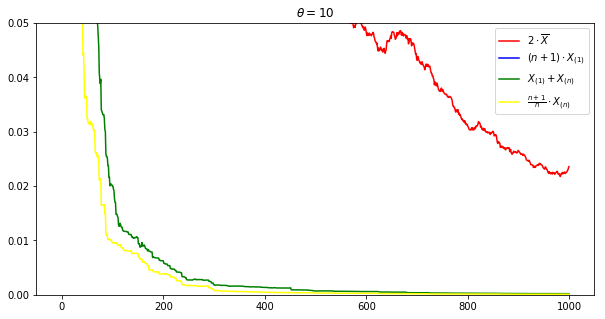

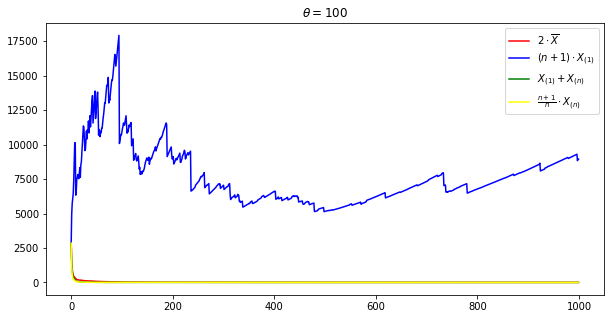

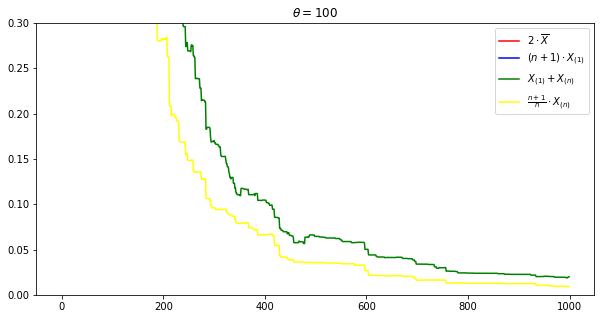

In [94]:
colors = ('red', 'blue', 'green', 'yellow')
labels = (r'$2 \cdot \overline{X}$', r'$(n+1) \cdot X_{(1)}$',
          r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n} \cdot X_{(n)}$')
limits_y = (0.002, 0.05, 0.3)

#для каждой theta
for i in range(0, 3):
    plt.figure(figsize=(10, 5))
    #для каждой оценки
    for j in range(0, 4):
        #строим график
        plt.plot(average_loss[i][j], color=colors[j], label=labels[j])
    
    plt.title(r'$\theta = {}$'.format(theta[i]))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    for j in range(0, 4):
        #строим еще один график в масштабе
        plt.ylim(0, limits_y[i])
        plt.plot(average_loss[i][j], color=colors[j], label=labels[j])
    
    plt.title(r'$\theta = {}$'.format(theta[i]))
    plt.legend()
    plt.show()